In [9]:
#Implementing tf-idf + mnb classficiation for the imdb dataset
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from keras.datasets import imdb
from sklearn.metrics import confusion_matrix;
import plot_confusion_matrix;
import numpy as np

import json
import nltk

In [3]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

#plot_confusion_matrix(cnf_matrix, classes=["positive","negative"], normalize=True)
#plt.show()

In [5]:
word_to_index = imdb.get_word_index()
index_to_word = [None] * (max(word_to_index.values()) + 1)
for w, i in word_to_index.items():
    index_to_word[i] = w

In [6]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X_train = [
    ' '.join(
        index_to_word[i]
        for i in X_train[i]
        if i < len(index_to_word)
    ) for i in range(X_train.shape[0])
]

X_test = [
    ' '.join(
        index_to_word[i]
        for i in X_test[i]
        if i < len(index_to_word)
    ) for i in range(X_test.shape[0])
]

In [7]:
'''
model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('log', LogisticRegression())
])
'''
from sklearn.naive_bayes import MultinomialNB as MNB

model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2))),
    ('mnb', MNB())
])

model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=Tru...rue,
        vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test))
print((y_pred == y_test).mean())

             precision    recall  f1-score   support

          0       0.91      0.84      0.87     13560
          1       0.83      0.90      0.86     11440

avg / total       0.87      0.87      0.87     25000

0.86856


Confusion matrix, without normalization
[[11387  1113]
 [ 2173 10327]]


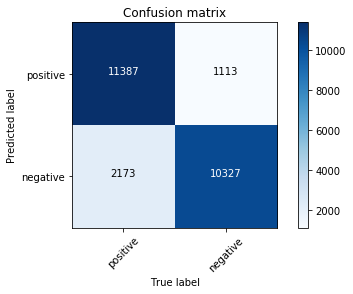

In [13]:
cnf_matrix=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix, classes=["positive","negative"], normalize=False)
plt.show()